In [1]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#getting our data
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)


In [3]:
# normalize our data
x_train, x_test = x_train / 255.0, x_test/255.0

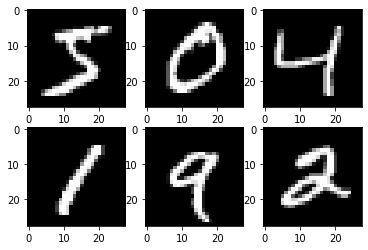

In [4]:
#ploting some of the examples
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i],cmap='gray')
plt.show()

In [5]:
#building our model
model = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)]
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
#loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.01)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metrics)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
#training our model
batch_size = 64
epochs = 5

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/5
938/938 - 4s - loss: 0.2186 - accuracy: 0.9338 - 4s/epoch - 4ms/step
Epoch 2/5
938/938 - 3s - loss: 0.1328 - accuracy: 0.9616 - 3s/epoch - 3ms/step
Epoch 3/5
938/938 - 3s - loss: 0.1155 - accuracy: 0.9658 - 3s/epoch - 3ms/step
Epoch 4/5
938/938 - 3s - loss: 0.0997 - accuracy: 0.9717 - 3s/epoch - 3ms/step
Epoch 5/5
938/938 - 3s - loss: 0.0914 - accuracy: 0.9744 - 3s/epoch - 3ms/step


In [8]:
#evaluate our model
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.1564 - accuracy: 0.9640 - 424ms/epoch - 3ms/step


[0.15636956691741943, 0.9639999866485596]

In [9]:
#making predictions
probability_model = keras.models.Sequential(
    [model,
    keras.layers.Softmax()]
)
predictions = probability_model(x_test)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.7957053e-21 2.4463112e-10 1.7348244e-09 1.6926330e-07 5.9004283e-21
 5.6498426e-16 3.5798923e-31 9.9999982e-01 4.5853239e-16 4.7446650e-17], shape=(10,), dtype=float32)
7


In [10]:
#making predictions
predictions = model(x_test)
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.7957053e-21 2.4463112e-10 1.7348244e-09 1.6926330e-07 5.9004283e-21
 5.6498426e-16 3.5798923e-31 9.9999982e-01 4.5853239e-16 4.7446650e-17], shape=(10,), dtype=float32)
7
